In [1]:
%load_ext autoreload
%autoreload 2
import glob
import random
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from modules import *
from utils import *

#### Calculate average cicularity of images for different digits

In [2]:
# separate out a few images for template generation
digit_1 = glob.glob("../../data/archive/Digit/1/*.jpg")
digit_5 = glob.glob("../../data/archive/Digit/5/*.jpg")
digit_6 = glob.glob("../../data/archive/Digit/6/*.jpg")
digit_9 = glob.glob("../../data/archive/Digit/9/*.jpg")

digit_circularity = {
    "1": [],
    "5": [],
    "6": [],
    "9": []
}
digit_size = {
    "1": [],
    "5": [],
    "6": [],
    "9": []
}
digit_metric = {
    "1": [],
    "5": [],
    "6": [],
    "9": []
}
sign=1
for i, digit in enumerate(digit_1):
    
    frame,_, largest_contour, dx, dy = find_skin_color_blobs(cv2.imread(digit))
    _, _, _, _, size, circularity = get_shape_features(frame, largest_contour, dx, dy)
    digit_circularity[f"{sign}"].append(circularity)
    digit_size[f"{sign}"].append(size)
    digit_metric[f"{sign}"].append(size*circularity*1e-5)
print(f"Digit {sign} circle: {np.mean(digit_circularity[f'{sign}'])}")
print(f"Digit {sign} size: {np.mean(digit_size[f'{sign}'])}")
print(f"Digit {sign} metric: {(np.mean(digit_circularity[f'{sign}'])*1e-5) * np.mean(digit_size[f'{sign}'])}")
print()

sign=5
for i, digit in enumerate(digit_5):
    
    frame,_, largest_contour, dx, dy = find_skin_color_blobs(cv2.imread(digit))
    _, _, _, _, size, circularity = get_shape_features(frame, largest_contour, dx, dy)
    digit_circularity[f"{sign}"].append(circularity)
    digit_size[f"{sign}"].append(size)
    digit_metric[f"{sign}"].append(size*circularity*1e-5)
print(f"Digit {sign} circle: {np.mean(digit_circularity[f'{sign}'])}")
print(f"Digit {sign} size: {np.mean(digit_size[f'{sign}'])}")
print(f"Digit {sign} metric: {(np.mean(digit_circularity[f'{sign}'])*1e-5) * np.mean(digit_size[f'{sign}'])}")
print()

sign=6
for i, digit in enumerate(digit_6):
    
    frame,_, largest_contour, dx, dy = find_skin_color_blobs(cv2.imread(digit))
    _, _, _, _, size, circularity = get_shape_features(frame, largest_contour, dx, dy)
    digit_circularity[f"{sign}"].append(circularity)
    digit_size[f"{sign}"].append(size)
    digit_metric[f"{sign}"].append(size*circularity*1e-5)
print(f"Digit {sign} circle: {np.mean(digit_circularity[f'{sign}'])}")
print(f"Digit {sign} size: {np.mean(digit_size[f'{sign}'])}")
print(f"Digit {sign} metric: {(np.mean(digit_circularity[f'{sign}'])*1e-5) * np.mean(digit_size[f'{sign}'])}")
print()

sign=9
for i, digit in enumerate(digit_9):
    
    frame,_, largest_contour, dx, dy = find_skin_color_blobs(cv2.imread(digit)) 
    _, _, _, _, size, circularity = get_shape_features(frame, largest_contour, dx, dy)
    digit_circularity[f"{sign}"].append(circularity)
    digit_size[f"{sign}"].append(size)
    digit_metric[f"{sign}"].append(size*circularity*1e-5)
print(f"Digit {sign} circle: {np.mean(digit_circularity[f'{sign}'])}")
print(f"Digit {sign} size: {np.mean(digit_size[f'{sign}'])}")
print(f"Digit {sign} metric: {(np.mean(digit_circularity[f'{sign}'])*1e-5) * np.mean(digit_size[f'{sign}'])}")
print()

Digit 1 circle: 0.23774824244665946
Digit 1 size: 456869.62422360247
Digit 1 metric: 1.0861995018642725

Digit 5 circle: 0.4409198683913752
Digit 5 size: 627247.7927631579
Digit 5 metric: 2.765660142339122

Digit 6 circle: 0.36812865938567374
Digit 6 size: 561513.314935065
Digit 6 metric: 2.067091438542511

Digit 9 circle: 0.34327133912399876
Digit 9 size: 533664.5402684563
Digit 9 metric: 1.8319174138094618



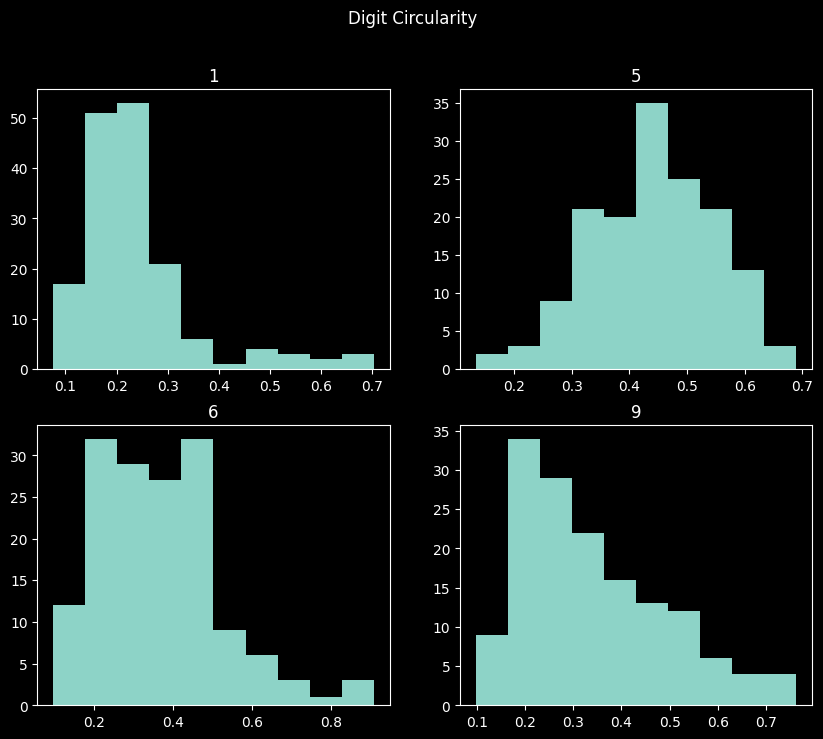

In [3]:
plt.figure(figsize=(10, 8))
for ind, i in enumerate(["1", "5", "6", "9"]):
    plt.subplot(2, 2, int(ind)+1)
    plt.hist(digit_circularity[f"{i}"])
    plt.title(i)
    plt.suptitle("Digit Circularity")

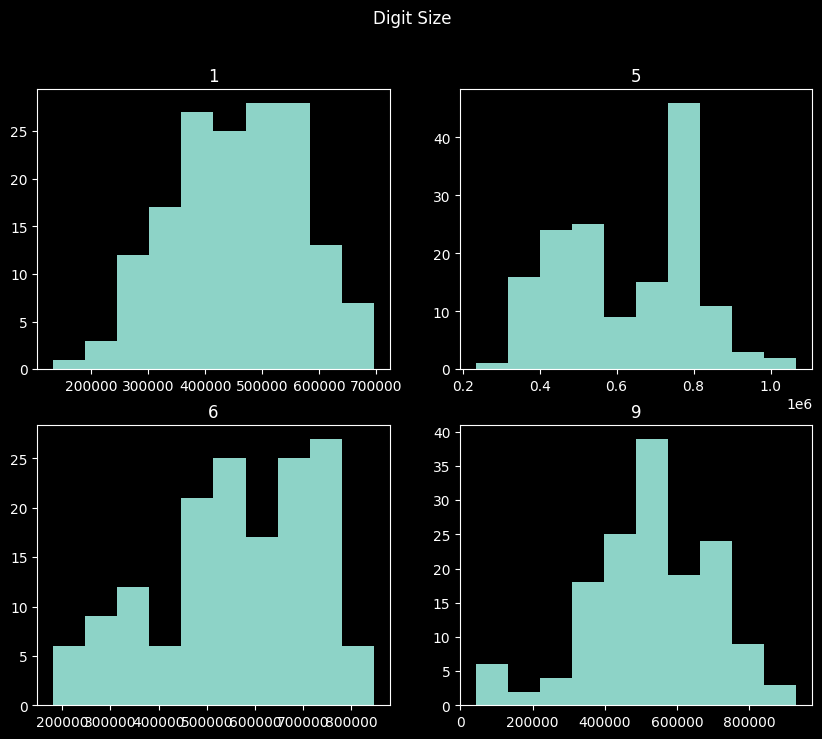

In [4]:
plt.figure(figsize=(10, 8))
for ind, i in enumerate(["1", "5", "6", "9"]):
    plt.subplot(2, 2, int(ind)+1)
    plt.hist(digit_size[f"{i}"])
    plt.title(i)
    plt.suptitle("Digit Size")

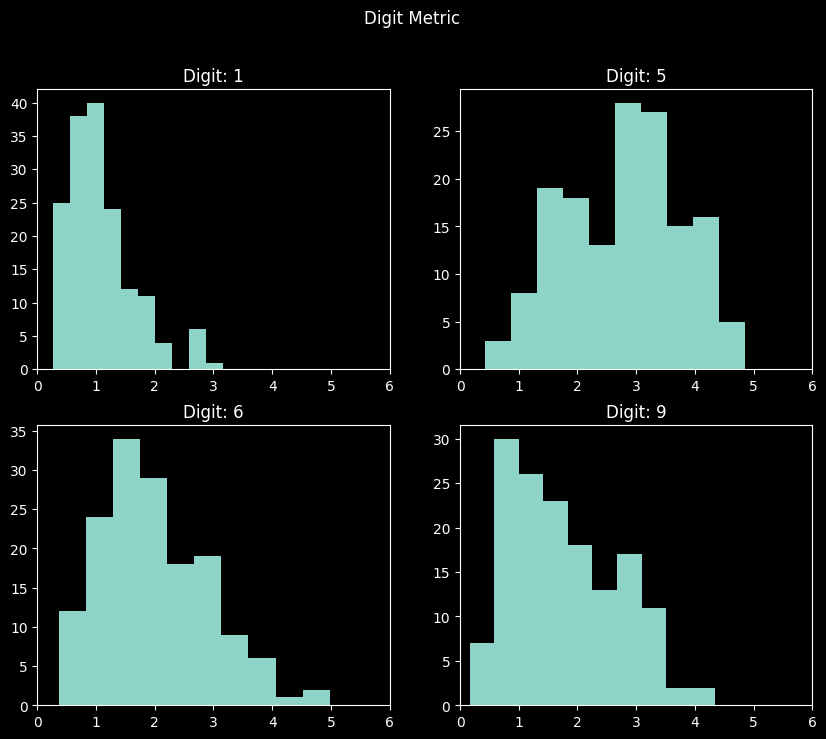

In [5]:
plt.figure(figsize=(10, 8))
for ind, i in enumerate(["1", "5", "6", "9"]):
    plt.subplot(2, 2, int(ind)+1)
    plt.hist(digit_metric[f"{i}"])
    plt.xlim(0, 6)
    plt.title("Digit: " + i)
    plt.suptitle("Digit Metric")

#### Generate average template from the images of the same digit

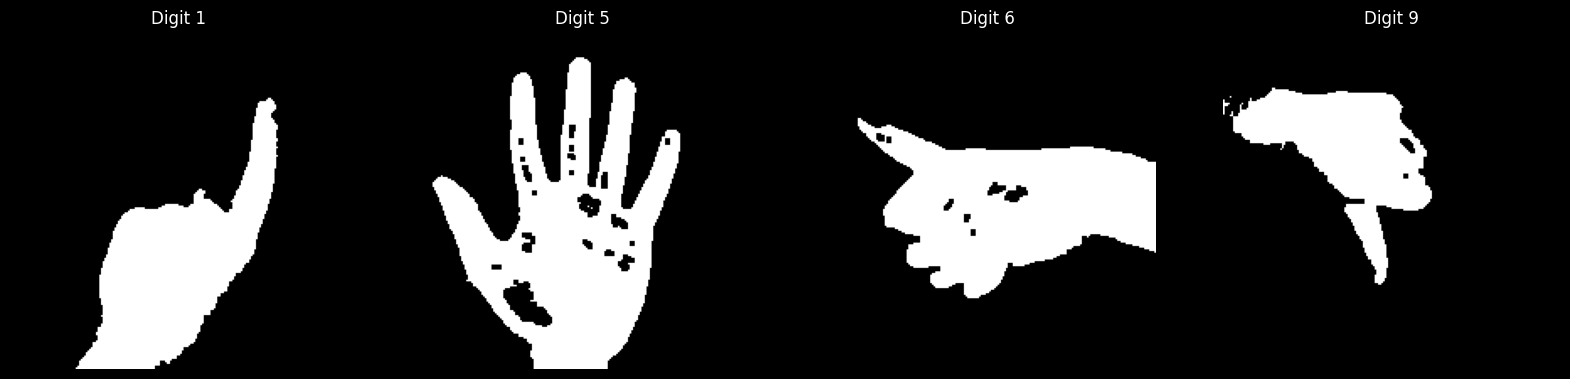

In [6]:
templates = get_templates("../../data/archive/Digit/", ext="jpg")
template_pyramids = {k: get_pyramid(v) for k, v in templates.items()}

Confusion Matrix

100%|██████████| 616/616 [02:36<00:00,  3.94it/s]


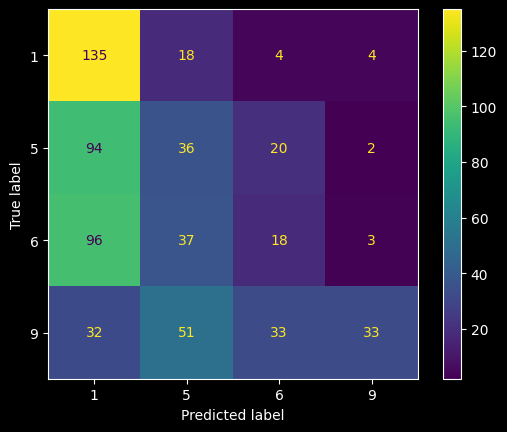

In [10]:
from tqdm import tqdm
from pathlib import Path
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
digit_files = Path("../../data/archive/Digit/")
ground_truth = []
predictions = []
for image_file in tqdm(digit_files.glob(r"[1,5,6,9]/*.jpg"), total=len(list(digit_files.glob(r"[1,5,6,9]/*jpg")))):
    digit = str(image_file.parent)[-1]
    image = cv2.imread(str(image_file))
    if digit in ["1", "5", "6", "9"]:
        hand_sign, skin_mask, largest_contour, dx, dy = find_skin_color_blobs(image)
        _, _, _, _, size, circularity = get_shape_features(hand_sign, largest_contour, dx, dy)
        skin_mask = preprocess(skin_mask)

        if circularity > 0.55:
            best_gesture="5"
        else:
            _, best_gesture = custom_template_matching(skin_mask=skin_mask, template_pyramids=template_pyramids, threshold=0.5) # TODO: can use classwise thresholds
        
        ground_truth.append((digit))
        predictions.append((best_gesture))

ConfusionMatrixDisplay.from_predictions(ground_truth, predictions)

#### Main

In [9]:
cap = cv2.VideoCapture(0)
ret, prev_frame = cap.read()
frame0 = prev_frame
if not ret:
    print("Can't receive frame (stream end?). Exiting ...")
    exit(0)

cv2.namedWindow('frame', cv2.WINDOW_NORMAL)
cv2.imshow('frame', prev_frame)

cv2.namedWindow('diff', cv2.WINDOW_NORMAL)
cv2.namedWindow('skin', cv2.WINDOW_NORMAL)
cv2.namedWindow('shape', cv2.WINDOW_NORMAL)

while True:
    ret, frame = cap.read()
    frame_immutable = frame
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    cv2.imshow('frame', frame)

    diff = find_frame_difference(frame, prev_frame)

    cv2.imshow('diff', diff)

    # frame_skin = find_skin_color_blobs(frame)
    frame_skin, skin_mask, largest_contour, bbx_x, bbx_y  = find_skin_color_blobs(frame)
    if largest_contour is None:
        prev_frame = frame
        cv2.imshow('skin', frame)
        continue

    else: 
        cv2.imshow('skin', skin_mask)

    frame_shape, centroid, position, orientation, size, circularity = get_shape_features(frame_skin, largest_contour, bbx_x, bbx_y)
    cv2.imshow('shape', frame_shape)

    
    if circularity > 0.55:
        best_gesture=5
    else:
        _, best_gesture = custom_template_matching(skin_mask=skin_mask, template_pyramids=template_pyramids, threshold=0.5) # TODO: can use classwise thresholds
    
    if best_gesture:
        print(f"Best gesture: {best_gesture}")
        cv2.putText(frame_shape, f"Best gesture: {best_gesture}", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        cv2.imshow('skin', frame_shape)
    prev_frame = frame
    
    if cv2.waitKey(30) == 27:
        print("esc key is pressed by user") 
        break


cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

Best gesture: 1
Best gesture: 1
Best gesture: 1
Best gesture: 1
Best gesture: 1
Best gesture: 1
Best gesture: 1
Best gesture: 5
Best gesture: 5
Best gesture: 1
Best gesture: 1
Best gesture: 5
Best gesture: 1
Best gesture: 1
Best gesture: 5
Best gesture: 5
Best gesture: 5
Best gesture: 5
Best gesture: 1
Best gesture: 5
Best gesture: 1
Best gesture: 5
Best gesture: 6
Best gesture: 6
Best gesture: 5
Best gesture: 6
Best gesture: 6
Best gesture: 6
Best gesture: 6
Best gesture: 6
Best gesture: 5
Best gesture: 5
Best gesture: 5
Best gesture: 5
Best gesture: 5
Best gesture: 5
Best gesture: 5
Best gesture: 5
Best gesture: 1
Best gesture: 5
Best gesture: 5
Best gesture: 5
Best gesture: 5
Best gesture: 5
Best gesture: 5
Best gesture: 5
Best gesture: 5
Best gesture: 5
Best gesture: 5
Best gesture: 5
Best gesture: 5
Best gesture: 5
Best gesture: 5
Best gesture: 5
Best gesture: 5
Best gesture: 5
Best gesture: 5
Best gesture: 5
Best gesture: 5
Best gesture: 5
Best gesture: 5
Best gesture: 5
Best ges

-1